# **[K-Drama Recommendation]**

### Proyek Machine Learning Terapan: Recommendation System
by Fajar Tirtayasa

<img src='https://drive.google.com/uc?export=view&id=1ZBtA_o080zjskyfQdckf_gq5LuUgFmSA'>

## **[Business Understanding]**
*MyDramaList.com* adalah proyek berbasis komunitas yang menyediakan drama & film Asia. Di situs web ini, penggemar dapat membuat daftar pantauan drama mereka sendiri, menilai drama dan film, hingga menulis ulasan. Dataset ini memeringkat 100 Drama Korea teratas yang diberikan oleh pengguna di situs web.

## **[Data Understanding]**

Source Dataset: https://www.kaggle.com/datasets/chanoncharuchinda/top-100-korean-drama-mydramalist

In [247]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from collections import Counter

In [248]:
#loading data
df = pd.read_csv('/Data Science/Dicoding/K-Drama Recommendation/top100_kdrama.csv')
df.head(3)

,Name,Year of release,Aired Date,Aired On,Number of Episode,Network,Duration,Content Rating,Synopsis,Cast,Genre,Tags,Rank,Rating
0,Move to Heaven,2021,"May 14, 2021",Friday,10,Netflix,52 min.,18+ Restricted (violence & profanity),Geu Roo is a young autistic man. He works for ...,"Lee Je Hoon, Tang Jun Sang, Hong Seung Hee, Ju...","Life, Drama, Family","Autism, Uncle-Nephew Relationship, Death, Sava...",#1,9.2
1,Hospital Playlist,2020,"Mar 12, 2020 - May 28, 2020",Thursday,12,"Netflix, tvN",1 hr. 30 min.,15+ - Teens 15 or older,The stories of people going through their days...,"Jo Jung Suk, Yoo Yeon Seok, Jung Kyung Ho, Kim...","Friendship, Romance, Life, Medical","Strong Friendship, Multiple Mains, Best Friend...",#2,9.1
2,Flower of Evil,2020,"Jul 29, 2020 - Sep 23, 2020","Wednesday, Thursday",16,tvN,1 hr. 10 min.,15+ - Teens 15 or older,Although Baek Hee Sung is hiding a dark secret...,"Lee Joon Gi, Moon Chae Won, Jang Hee Jin, Seo ...","Thriller, Romance, Crime, Melodrama","Married Couple, Deception, Suspense, Family Se...",#3,9.1


Informasi mengenai kolom dataframe:
- **Name**: nama drama korea.
- **Year of release**: tahun rilis drama.
- **Aired Date**: tanggal penayangan (mulai-selesai).
- **Aired On**: hari penayangan.
- **Number of Episode**: banyaknya episode.
- **Network**: jaringan/saluran media penayangan drama.
- **Duration**: durasi tiap episode.
- **Content Rating**: tingkatan konten (sesuai usia).
- **Synopsis**: sinopsis drama korea.
- **Cast**: aktor atau aktris dalam drama.
- **Genre**: genre drama korea.
- **Tags**: tag yang terdapat pada drama.
- **Rank**: peringkat di situs web.
- **Rating**: nilai rating untuk drama korea (1-10).

### Exploratory Data Analysis: Descriptive Statistic

In [249]:
#melihat banyaknya baris dan kolom pada dataframe
df.shape

(100, 14)

In [250]:
#mengecek banyaknya Non-Null value dan tipe data di setiap kolom
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               100 non-null    object 
 1   Year of release    100 non-null    int64  
 2   Aired Date         100 non-null    object 
 3   Aired On           100 non-null    object 
 4   Number of Episode  100 non-null    int64  
 5   Network            100 non-null    object 
 6   Duration           100 non-null    object 
 7   Content Rating     100 non-null    object 
 8   Synopsis           100 non-null    object 
 9   Cast               100 non-null    object 
 10  Genre              100 non-null    object 
 11  Tags               100 non-null    object 
 12  Rank               100 non-null    object 
 13  Rating             100 non-null    float64
dtypes: float64(1), int64(2), object(11)
memory usage: 11.1+ KB


In [251]:
#melihat banyaknya Null value di setiap kolom
df.isna().sum()

Name                 0
Year of release      0
Aired Date           0
Aired On             0
Number of Episode    0
Network              0
Duration             0
Content Rating       0
Synopsis             0
Cast                 0
Genre                0
Tags                 0
Rank                 0
Rating               0
dtype: int64

In [252]:
#mengecek ada tidaknya data yang duplikat
df[df.duplicated()]

,Name,Year of release,Aired Date,Aired On,Number of Episode,Network,Duration,Content Rating,Synopsis,Cast,Genre,Tags,Rank,Rating


In [253]:
#melihat statistik deskriptif untuk kolom dengan tipe data numerik
df.describe()

,Year of release,Number of Episode,Rating
count,100.000000,100.000000,100.000000
mean,2017.970000,19.070000,8.723000
std,2.869044,12.378096,0.174573
min,2003.000000,6.000000,8.500000
25%,2017.000000,16.000000,8.600000
50%,2019.000000,16.000000,8.700000
75%,2020.000000,20.000000,8.800000
max,2021.000000,100.000000,9.200000


In [254]:
#melihat statistik deskriptif untuk kolom dengan tipe data object
df.describe(include='object')

,Name,Aired Date,Aired On,Network,Duration,Content Rating,Synopsis,Cast,Genre,Tags,Rank
count,100,100,100,100,100,100,100,100,100,100,100
unique,99,100,9,13,26,3,100,99,86,100,100
top,Kingdom,"May 14, 2021","Monday, Tuesday",tvN,60 min.,15+ - Teens 15 or older,Geu Roo is a young autistic man. He works for ...,"Jo Jung Suk, Yoo Yeon Seok, Jung Kyung Ho, Kim...","Psychological, Comedy, Romance, Drama","Autism, Uncle-Nephew Relationship, Death, Sava...",#1
freq,2,1,24,19,20,88,1,2,4,1,1


In [255]:
#mengecek data yang sama pada kolom 'Name'
df[df['Name']=='Kingdom']

,Name,Year of release,Aired Date,Aired On,Number of Episode,Network,Duration,Content Rating,Synopsis,Cast,Genre,Tags,Rank,Rating
16,Kingdom,2020,"Mar 13, 2020",Friday,6,Netflix,45 min.,18+ Restricted (violence & profanity),"Following the events in season one, waves of t...","Joo Ji Hoon, Bae Doo Na, Kim Sung Gyu, Ryu Seu...","Thriller, Historical, Horror, Supernatural","Zombies, Corruption, Strong Male Lead, Gore, S...",#17,8.9
24,Kingdom,2019,"Jan 25, 2019",Friday,6,Netflix,51 min.,18+ Restricted (violence & profanity),No sooner does the Joseon King succumb to smal...,"Joo Ji Hoon, Ryu Seung Ryong, Bae Doo Na, Kim ...","Thriller, Historical, Horror, Political","Joseon Dynasty, Adapted From A Webtoon, Power ...",#25,8.8


In [256]:
#mengganti K-Drama berjudul 'Kingdom' yang rilis tahun 2020 menjadi 'Kingdom_2'
df.loc[16, 'Name'] = 'Kingdom_2'

Beberapa informasi yang dapat diperoleh dari tahapan Descriptive Statistic di atas adalah:
- Dataset ini terdiri atas 100 baris dan 14 kolom (3 kolom dengan tipe data numerik, dan 11 kolom dengan tipe data object).
- Tidak terdapat *missing value* pada data. Dengan demikian, proses *handling missing value* tidak diperlukan.
- Tidak terdapat data yang duplikat pada dataset. Adapun judul yang sama pada kolom 'Name' mengartikan bahwa serial K-Drama tersebut dibagi ke dalam 2 season yang dirilis pada waktu berbeda.
- Terdapat beberapa kolom yang memiliki *multiple value*, seperti kolom 'Aired On', 'Network', 'Genre', dan 'Tags'.

### Exploratory Data Analysis: Univariate Analysis

#### **Categorical Data**

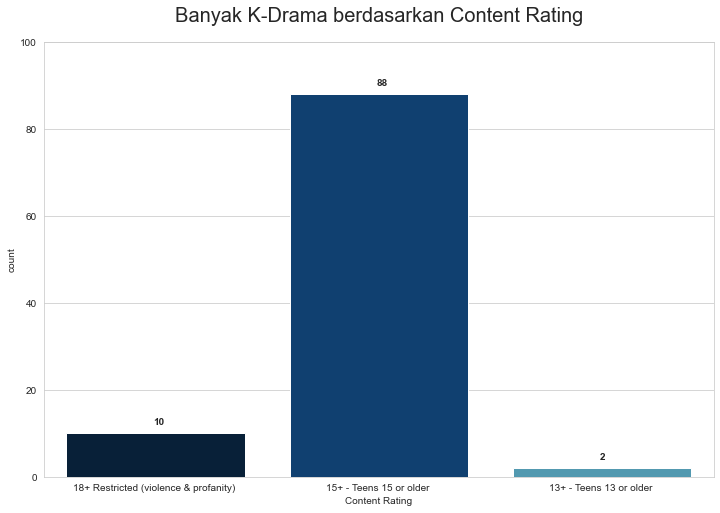

In [257]:
#banyaknya K-Drama berdasarkan Content Rating
count = df['Content Rating'].value_counts().sort_index(ascending=False)
#membuat count plot untuk kolom 'Content Rating'
sns.set_style('whitegrid')
sns.countplot(x='Content Rating', data=df, palette='ocean')
for i, v in enumerate(count):
    plt.text(i-0.01, v+2, str(v), fontweight='bold')
plt.title('Banyak K-Drama berdasarkan Content Rating', pad=20, fontsize=20)
plt.ylim(ymax=100)
plt.gcf().set_size_inches(12,8)
plt.savefig('cat_1.png', quality=95)
plt.show()

       tvN  Netflix  SBS  jTBC  KBS2  MBC  OCN  Viki
Count   35       29   19    11    11    9    8     1


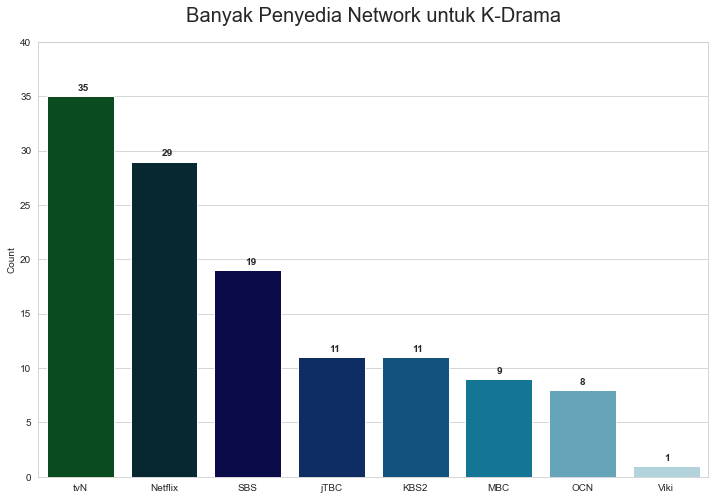

In [258]:
#menampung semua data network yang muncul ke dalam list
network_list = []
for networks in df['Network'].to_list():
    networks = networks.strip().split(",  ")
    for network in networks:
        network_list.append(network)
#membuat dataframe yang berisi banyak setiap network
network_df = pd.DataFrame.from_dict(Counter(network_list), orient='index').rename(columns={0:'Count'})
network_df.sort_values(by='Count', ascending = False, inplace = True)
print(network_df.T)

#membuat barplot untuk melihat banyak setiap network
sns.set_style('whitegrid')
sns.barplot(x=network_df.index, y=network_df['Count'], palette='ocean')
for i, v in enumerate(network_df['Count']):
    plt.text(i-0.03, v+0.5, str(v), fontweight='bold')
plt.ylim(ymax=40)
plt.title('Banyak Penyedia Network untuk K-Drama', pad=20, fontsize=20)
plt.gcf().set_size_inches(12,8)
plt.savefig('cat_2.png', quality=95)
plt.show()

Total Genre unik:  26
5 Genre yang Paling Sering Diadopsi:
           Count
Drama        52
Romance      49
Comedy       36
Mystery      33
Thriller     33


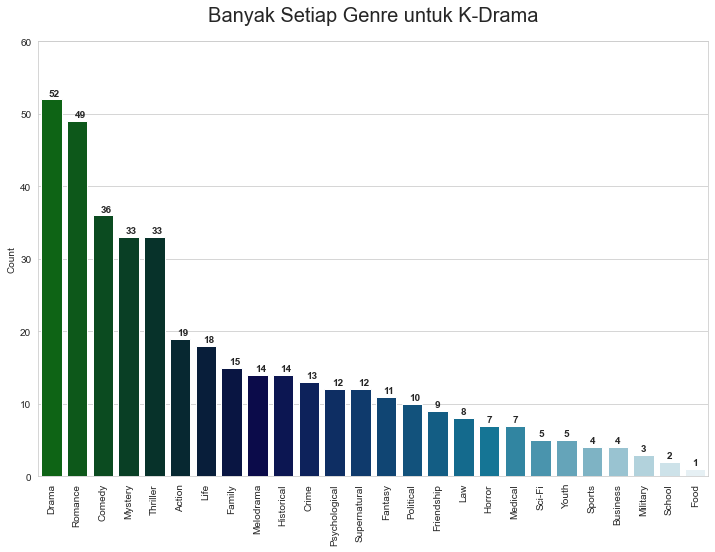

In [259]:
#menampung semua data genre yang muncul ke dalam list
genre_list = []
for genre in df['Genre'].to_list():
    genre = genre.strip().split(",  ")
    for gen in genre:
        genre_list.append(gen)
#membuat dataframe yang berisi banyak setiap genre
genre_df = pd.DataFrame.from_dict(Counter(genre_list), orient='index').rename(columns={0:'Count'})
genre_df.sort_values(by='Count', ascending = False, inplace = True)
print('Total Genre unik: ', len(genre_df))
print('5 Genre yang Paling Sering Diadopsi:\n', genre_df.head())

#membuat barplot untuk melihat banyak setiap genre
sns.set_style('whitegrid')
sns.barplot(x=genre_df.index, y=genre_df['Count'], palette='ocean')
for i, v in enumerate(genre_df['Count']):
    plt.text(i-0.1, v+0.5, str(v), fontweight='bold')
plt.ylim(ymax=60)
plt.title('Banyak Setiap Genre untuk K-Drama', pad=20, fontsize=20)
plt.xticks(rotation=90)
plt.gcf().set_size_inches(12,8)
plt.savefig('cat_3.png', quality=95)
plt.show()

10 Tag dengan kemunculan tebanyak:
                     Count
Strong Female Lead     43
Smart Female Lead      22
Bromance               21
Smart Male Lead        19
Murder                 18
Strong Male Lead       16
Death                  15
Nice Male Lead         15
Revenge                13
Trauma                 13


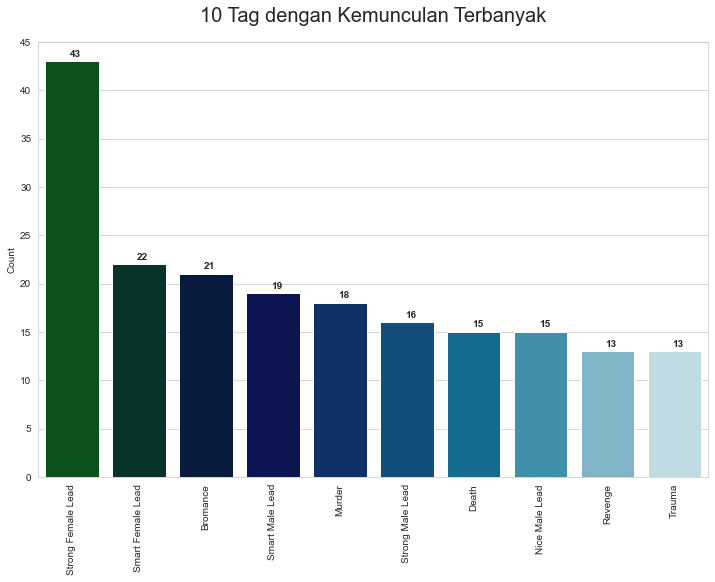

In [260]:
#menampung semua data tags yang muncul ke dalam list
tags_list = []
for tags in df['Tags'].to_list():
    tags = tags.strip().split(", ")
    for tag in tags:
        tags_list.append(tag)
#membuat dataframe yang berisi banyak setiap tag
tags_df = pd.DataFrame.from_dict(Counter(tags_list), orient='index').rename(columns={0:'Count'})
tags_df.sort_values(by='Count', ascending = False, inplace = True)
top_tags_df = tags_df.head(10)
print('10 Tag dengan kemunculan tebanyak:\n',top_tags_df)

#membuat barplot untuk melihat 10 tag dengan kemunculan terbanyak
sns.set_style('whitegrid')
sns.barplot(x=top_tags_df.index, y=top_tags_df['Count'], palette='ocean')
for i, v in enumerate(top_tags_df['Count']):
    plt.text(i-0.03, v+0.5, str(v), fontweight='bold')
plt.ylim(ymax=45)
plt.title('10 Tag dengan Kemunculan Terbanyak', pad=20, fontsize=20)
plt.xticks(rotation=90)
plt.gcf().set_size_inches(12,8)
plt.savefig('cat_4.png', quality=95)
plt.show()

#### **Numerical Data**

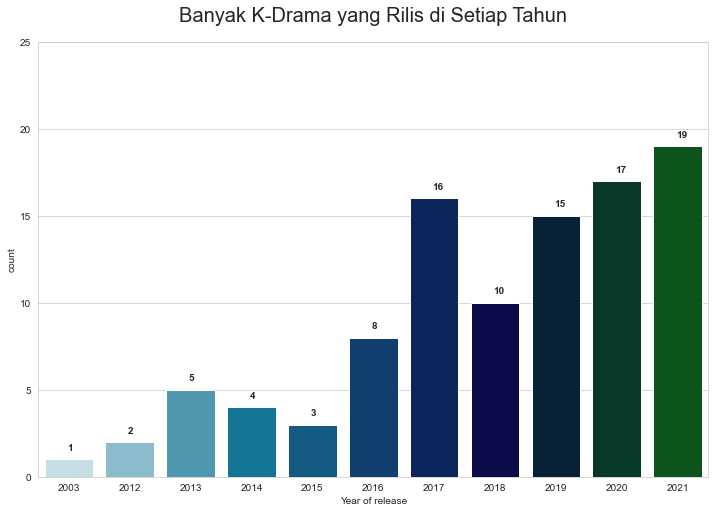

In [261]:
#banyaknya K-Drama yang rilis di setiap tahun
count = df['Year of release'].value_counts().sort_index()
#membuat count plot untuk kolom 'Year of release'
sns.set_style('whitegrid')
sns.countplot(x='Year of release', data=df, palette='ocean_r')
for i, v in enumerate(count):
    plt.text(i-0.03, v+0.5, str(v), fontweight='bold')
plt.ylim(ymax=25)
plt.title('Banyak K-Drama yang Rilis di Setiap Tahun', pad=20, fontsize=20)
plt.gcf().set_size_inches(12,8)
plt.savefig('num_1.png', quality=95)
plt.show()

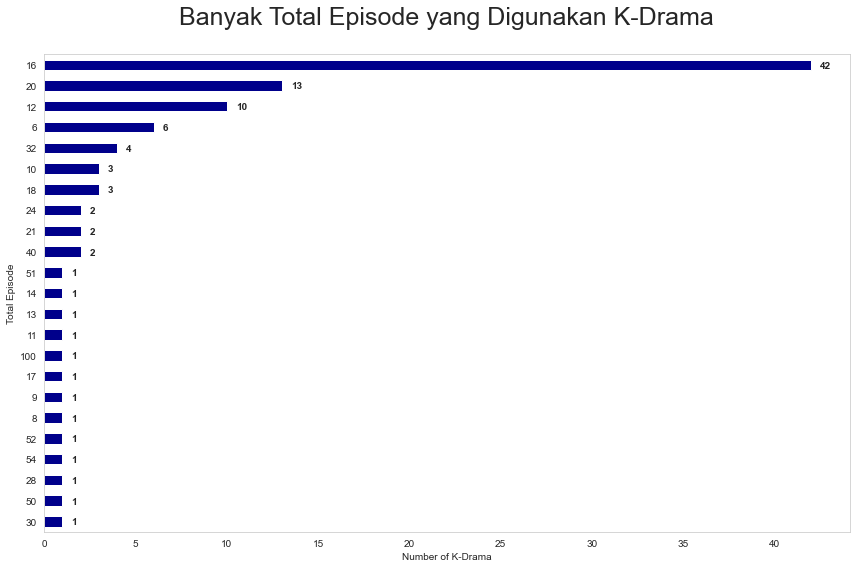

In [262]:
#banyaknya total episode yang digunakan K-Drama
count_each_episode = df['Number of Episode'].value_counts().sort_values()
#visualisasi count_each_episode
count_each_episode.plot(kind='barh', figsize=(12,8), color='darkblue')
plt.grid(False)
plt.title('Banyak Total Episode yang Digunakan K-Drama', pad=30, fontsize=25)
plt.xlabel('Number of K-Drama')
plt.ylabel('Total Episode')
for i, v in enumerate(count_each_episode):
    plt.text(v+0.5, i-0.15, str(v), fontweight='bold')
plt.tight_layout()
plt.savefig('num_2.png', quality=95)
plt.show()

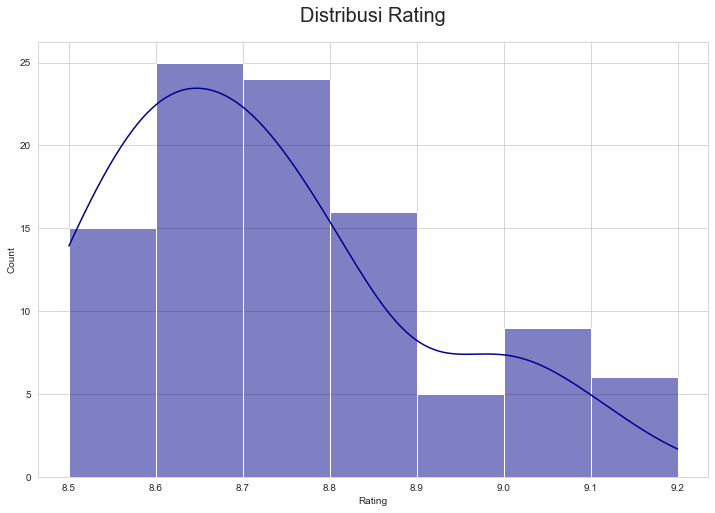

In [263]:
#membuat histogram untuk melihat distribusi data pada kolom 'Rating'
sns.set_style('whitegrid')
sns.histplot(data=df, x='Rating', kde=True, bins=7, color='darkblue')
plt.gcf().set_size_inches(12,8)
plt.title('Distribusi Rating', pad=20, fontsize=20)
plt.savefig('num_3.png', quality=95)
plt.show()

Beberapa informasi yang dapat diperoleh dari tahapan Univariate Analysis di atas adalah:
- 5 genre terbanyak yang muncul pada data top 100 drama korea adalah Drama, Romance, Comedy, Mistery, dan Thriller. Dengan kentalnya genre Drama dan Romance pada industri perfilman ini, menjadikan hampir seluruh drama korea mensyaratkan penikmatnya berusia di atas 15 tahun. Adapun dalam proses penayangannya--tvN, Netflix, dan SBS berhasil menjadi network/penyedia layanan siaran yang paling banyak menggaet drama-drama korea terbaik untuk tayang pada platformnya.
- Apabila dilihat dari trennya, banyak drama korea terbaik di setiap tahun cenderung mengalami kenaikan seiring dengan waktu berlalu. Hal ini menandakan bahwa industri ini memang berkembang dan terus melakukan *improvement* agar dapat diterima dengan baik oleh masyarakat.
- Mayoritas pembuat drama korea membagi keseluruhan cerita drama korea ke dalam 12, 16, atau 20 episode.
- Data top 100 drama korea memiliki interval rating antara 8.5 hingga 9.2, dengan rata-rata rating sebesar 8.72.

## **[Data Preparation]**

#### **Mengambil Kolom yang Diperlukan**

In [264]:
content_df = df[['Name', 'Year of release', 'Genre']]
content_df

,Name,Year of release,Genre
0,Move to Heaven,2021,"Life, Drama, Family"
1,Hospital Playlist,2020,"Friendship, Romance, Life, Medical"
2,Flower of Evil,2020,"Thriller, Romance, Crime, Melodrama"
3,Hospital Playlist 2,2021,"Friendship, Romance, Life, Medical"
4,My Mister,2018,"Psychological, Life, Drama, Family"
...,...,...,...
95,Vagabond,2019,"Action, Thriller, Mystery, Crime"
96,Doctor John,2019,"Mystery, Romance, Life, Medical"
97,When the Camellia Blooms,2019,"Thriller, Comedy, Romance, Drama, Family"
98,Because This Is My First Life,2017,"Comedy, Romance, Life, Drama"


#### **Menghilangkan Karakter Strip (-) Sebelum Vectorizer**

In [265]:
#menghilangkan string strip (-)
content_df['Genre'] = content_df['Genre'].apply(lambda x: x.replace('-', ''))
content_df['Genre']

0                            Life,  Drama,  Family 
1            Friendship,  Romance,  Life,  Medical 
2           Thriller,  Romance,  Crime,  Melodrama 
3            Friendship,  Romance,  Life,  Medical 
4            Psychological,  Life,  Drama,  Family 
                          ...                      
95             Action,  Thriller,  Mystery,  Crime 
96              Mystery,  Romance,  Life,  Medical 
97    Thriller,  Comedy,  Romance,  Drama,  Family 
98                 Comedy,  Romance,  Life,  Drama 
99            Business,  Comedy,  Romance,  Sports 
Name: Genre, Length: 100, dtype: object

#### **TF-IDF Vectorizer**

In [266]:
from sklearn.feature_extraction.text import CountVectorizer 
#inisialisasi CountVectorizer
tf = CountVectorizer()
#melakukan perhitungan idf pada data genre
tf.fit(content_df['Genre']) 
#mapping array dari fitur index integer ke fitur nama
tf.get_feature_names()

['action',
 'business',
 'comedy',
 'crime',
 'drama',
 'family',
 'fantasy',
 'food',
 'friendship',
 'historical',
 'horror',
 'law',
 'life',
 'medical',
 'melodrama',
 'military',
 'mystery',
 'political',
 'psychological',
 'romance',
 'school',
 'scifi',
 'sports',
 'supernatural',
 'thriller',
 'youth']

#### **Fit dan Transform ke Bentuk Matriks**

In [267]:
#melakukan fit lalu ditransformasikan ke bentuk matrix
tfidf_matrix = tf.fit_transform(content_df['Genre'])
#melihat ukuran matrix tf-idf
tfidf_matrix.shape

(100, 26)

#### **Mengubah Vektor TF_IDF dalam Bentuk Matriks**

In [268]:
#mengubah vektor tf-idf dalam bentuk matriks dengan fungsi todense()
tfidf_matrix.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 1, 0],
        ...,
        [0, 0, 1, ..., 0, 1, 0],
        [0, 0, 1, ..., 0, 0, 0],
        [0, 1, 1, ..., 0, 0, 0]], dtype=int64)

#### **Melihat Matriks TF-IDF untuk Beberapa K-Drama dan Genre**

In [269]:
pd.DataFrame(tfidf_matrix.todense(),
             columns=tf.get_feature_names(),
             index=content_df['Name']).sample(26, axis=1).sample(10, axis=0)

,life,scifi,mystery,sports,law,historical,horror,medical,friendship,fantasy,...,youth,thriller,military,family,psychological,school,action,political,melodrama,comedy
Name,,,,,,,,,,,,,,,,,,,,,
Hotel del Luna,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
Just Between Lovers,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
Tunnel,0,1,1,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
Mouse,0,1,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
Squid Game,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
Healer,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
Dear My Friends,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
My Father is Strange,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
Youth of May,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


## **[Modelling]**

#### **Latih Model dengan Cosine Similarity**

In [270]:
from sklearn.metrics.pairwise import cosine_similarity
 
#menghitung cosine similarity pada matrix tf-idf
cosine_sim = cosine_similarity(tfidf_matrix) 
cosine_sim

array([[1.        , 0.28867513, 0.        , ..., 0.51639778, 0.57735027,
        0.        ],
       [0.28867513, 1.        , 0.25      , ..., 0.2236068 , 0.5       ,
        0.25      ],
       [0.        , 0.25      , 1.        , ..., 0.4472136 , 0.25      ,
        0.25      ],
       ...,
       [0.51639778, 0.2236068 , 0.4472136 , ..., 1.        , 0.67082039,
        0.4472136 ],
       [0.57735027, 0.5       , 0.25      , ..., 0.67082039, 1.        ,
        0.5       ],
       [0.        , 0.25      , 0.25      , ..., 0.4472136 , 0.5       ,
        1.        ]])

In [271]:
#membuat dataframe dari variabel cosine_sim dengan baris dan kolom berupa nama K-Drama
cosine_sim_df = pd.DataFrame(cosine_sim,
                             index=content_df['Name'],
                             columns=content_df['Genre'])
print('Shape:', cosine_sim_df.shape)

#melihat similarity matrix pada babarapa K-Drama
cosine_sim_df.sample(10, axis=1).sample(5, axis=0)

Shape: (100, 100)


Genre,"Friendship, Comedy, Life, Drama","Business, Comedy, Crime, Drama","Thriller, Mystery, Horror, Supernatural","Drama, Sports, Melodrama","Thriller, Mystery, Drama, Political","Thriller, Mystery, Law, Drama","Comedy, Romance, Drama","Action, Comedy, Romance, Melodrama","Action, Thriller, Mystery, Crime","Historical, Romance, Fantasy, Political"
Name,,,,,,,,,,
Mouse,0.000000,0.000000,0.577350,0.000000,0.577350,0.577350,0.000000,0.000000,0.577350,0.000000
Racket Boys,0.500000,0.250000,0.000000,0.288675,0.000000,0.000000,0.288675,0.250000,0.000000,0.000000
What's Wrong with Secretary Kim,0.500000,0.500000,0.000000,0.000000,0.000000,0.000000,0.577350,0.500000,0.000000,0.250000
Hometown Cha-Cha-Cha,0.577350,0.288675,0.000000,0.000000,0.000000,0.000000,0.666667,0.577350,0.000000,0.288675
Strong Woman Do Bong Soon,0.408248,0.408248,0.408248,0.235702,0.408248,0.408248,0.707107,0.612372,0.408248,0.204124


#### **Uji Model**

In [272]:
#indikasi judul K-Drama berdasarkan urutan data
indices = pd.Series(index = content_df['Name'], data = content_df.index)
indices.head()

Name
Move to Heaven         0
Hospital Playlist      1
Flower of Evil         2
Hospital Playlist 2    3
My Mister              4
dtype: int64

In [273]:
#membuat fungsi untuk memanggil 10 rekomendasi K-Drama berdasarkan judul yang diinput
def get_recommendations(judul, cosine_sim = cosine_sim, 
                        items = content_df[['Name', 'Year of release', 'Genre']]):
    #mengambil indeks dari judul K-Drama yang telah didefinisikan sebelumnnya
    idx = indices[judul]
    #mengambil skor kemiripan dengan semua judul
    sim_scores = list(enumerate(cosine_sim[idx]))
    #mengurutkan K-Drama berdasarkan skor kemiripan
    sim_scores = sorted(sim_scores, key = lambda x : x[1], reverse = True)
    #mengambil 10 skor kemiripan dari 1-11 (0 tidak dimasukan, karena adalah data yang diinput)
    sim_scores = sim_scores[1:11]
    #mengambil judul K-Drama dari skor kemiripan
    drama_indices = [i[0] for i in sim_scores]
    #mengembalikan 10 rekomendasi judul K-Drama
    return pd.DataFrame(content_df['Name'][drama_indices]).merge(items)

In [274]:
#mengambil salah satu data K-Drama untik diuji
content_df[content_df['Name'] == "Dali and the Cocky Prince"]

,Name,Year of release,Genre
90,Dali and the Cocky Prince,2021,"Comedy, Romance, Drama"


In [275]:
#menampilkan 10 rekomendasi K-Drama yang sesuai dengan data uji
rekomendasi = pd.DataFrame(get_recommendations("Dali and the Cocky Prince"))
rekomendasi

,Name,Year of release,Genre
0,It's Okay to Not Be Okay,2020,"Psychological, Comedy, Romance, Drama"
1,"Kill Me, Heal Me",2015,"Psychological, Comedy, Romance, Drama"
2,"It's Okay, That's Love",2014,"Psychological, Comedy, Romance, Drama"
3,My Father is Strange,2017,"Comedy, Romance, Drama, Family"
4,My Love from the Star,2013,"Comedy, Romance, Drama, Supernatural"
5,Once Again,2020,"Comedy, Romance, Drama, Family"
6,Yumi's Cells,2021,"Psychological, Comedy, Romance, Drama"
7,Because This Is My First Life,2017,"Comedy, Romance, Life, Drama"
8,When the Camellia Blooms,2019,"Thriller, Comedy, Romance, Drama, Family"
9,Strong Woman Do Bong Soon,2017,"Action, Thriller, Comedy, Romance, Drama, ..."


## **[Evaluation]**

In [276]:
#melihat persebaran genre hasil rekomendasi
count = pd.DataFrame(rekomendasi['Genre'].value_counts().reset_index().values,
                     columns = ['Genre', 'Count'])
count.head()

,Genre,Count
0,"Psychological, Comedy, Romance, Drama",4
1,"Comedy, Romance, Drama, Family",2
2,"Comedy, Romance, Drama, Supernatural",1
3,"Comedy, Romance, Life, Drama",1
4,"Thriller, Comedy, Romance, Drama, Family",1


In [277]:
TP = 10 #jumlah prediksi benar untuk genre yang mirip atau serupa
FP = 0 #jumlah prediksi salah untuk genre yang mirip atau serupa

Precision = TP/(TP+FP)
print("{0:.0%}".format(Precision))

100%
